# **Productivity Study**

## Objectives

* Answer business requirement 1:
  * The client would like to know which factors are most relevant for task success.

## Inputs

* The Productivity_with_AI.csv file in 'outputs/datasets/collection/'

## Outputs

* Code that answers business requirement 1 

## Additional Comments

* No additional comments.


---

# Change working directory

The notebooks are stored in a subfolder. Therefore when running the notebook in the editor, you will need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Portfolio-Project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Portfolio-Project-5'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Productivity_with_AI.csv"))

df.head(10)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
5,4.53,429,1,7.1,5,0,3.06,3.9,1
6,8.16,600,1,8.3,6,0,0.30,2.2,1
7,6.53,600,4,3.6,9,3,1.47,9.1,0
8,4.06,409,5,6.1,6,2,2.43,7.0,0
9,6.09,567,5,7.3,7,0,2.11,5.1,1


---

# Data Exploration

Through the ProfileReport by YData we can easily familiarise ourselves with the dataset since it provides a lot of information about it (like missing levels and distribution) in a straightforward way.

In [5]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Productivity Correlation Study

First we will study the linear relationship between the variables and the target with the Pearson correlation test.

In [6]:
correlation_pearson = df.corr(method='pearson')['task_success'].sort_values(key=abs, ascending=False)[1:].head(10)
correlation_pearson

coffee_intake_mg    0.695185
hours_coding        0.615528
commits             0.338944
ai_usage_hours      0.241668
cognitive_load     -0.199840
sleep_hours         0.186662
bugs_reported      -0.178226
distractions       -0.104303
Name: task_success, dtype: float64

Second we will study the monotonic relationship between the variables and the target with the Spearman correlation test.

In [7]:
correlation_spearman = df.corr(method='spearman')['task_success'].sort_values(key=abs, ascending=False)[1:].head(10)
correlation_spearman

hours_coding        0.661058
coffee_intake_mg    0.658418
commits             0.355235
ai_usage_hours      0.264224
sleep_hours         0.165640
cognitive_load     -0.158588
bugs_reported      -0.151838
distractions       -0.110564
Name: task_success, dtype: float64

In [8]:
set(correlation_pearson[:4].index.to_list() + correlation_spearman[:4].index.to_list())

{'ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding'}

The four most relevant variables for task_success are: `ai_usage_hours`, `coffee_intake_mg`, `commits`, `hours_coding`.

In [9]:
relevant_variables = ['ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding']
relevant_variables

['ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding']

# Exploratory Data Analysis on relevant variables

In [10]:
df_eda = df.filter(relevant_variables + ['task_success'])
df_eda.head()

,ai_usage_hours,coffee_intake_mg,commits,hours_coding,task_success
0,0.71,600,2,5.99,1
1,1.75,568,5,4.72,1
2,2.27,560,2,6.30,1
3,1.40,600,9,8.05,0
4,1.26,421,4,4.53,1


## The distribution by task_success

We plot the distribution coloured by by `task_success`.

In [11]:
%matplotlib inline

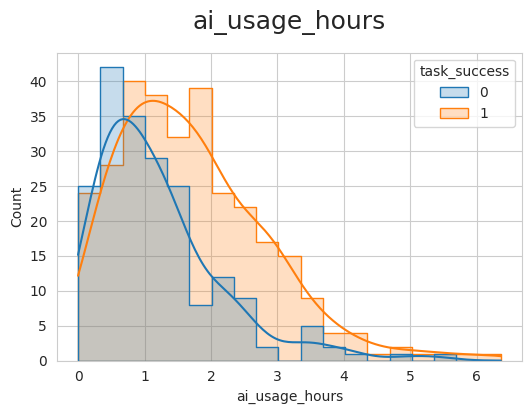

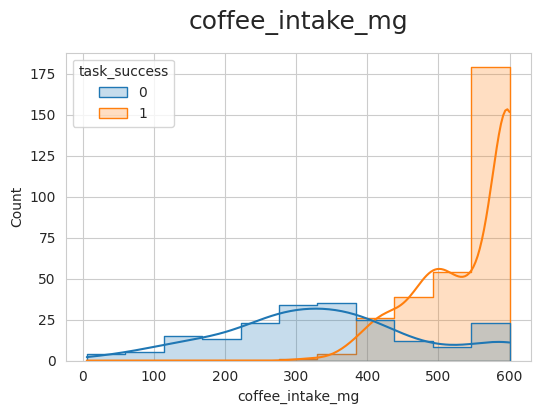

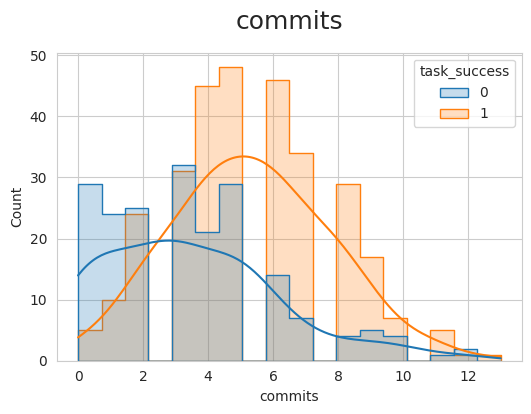

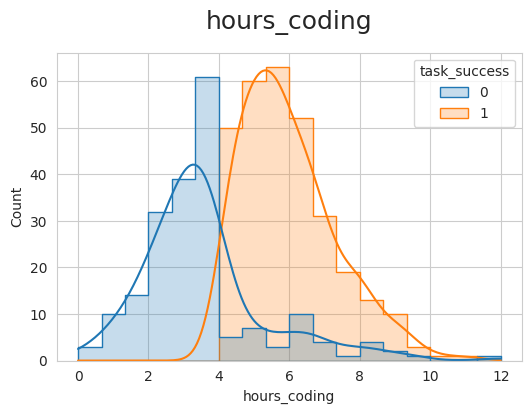

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# The 'blueprint' for this code was taken from Code Institute's second
# walkthrough project of their 'Predictive Analytics' course and adjusted for
# this project's purposes.


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=18, y=1.05)
    plt.show()


target_var = 'task_success'
for col in relevant_variables:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

# Conclusion

* Counter to our hypothesis `sleep_hours` and `distractions` are not as relevant to `task_success` as other variables.
* The most relevant factors are `caffee_intake_mg` and `hours_coding` which show a strong positive correlation to `task_success`.
* `ai_usage_hours` shows weak correlation to `task_success`. However, at 2-hour mark of AI usage the data shows the biggest discrepancy between task success and no task success suggesting that this might be the sweet spot for AI usage.